### Colab Activity 12.3: Evaluation Curves – Precision vs. Recall and ROC

**Estimated Time: 90 Minutes**


This assignment focuses on using the precision-recall curves and receiver operating characteristic (ROC) curves to examine tradeoffs in classifier performance.  Also, these curves and the area they determine can be viewed as a metric itself.  Scikit-learn implements all of this, and by the end of this activity, you should be comfortable with these functions.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.compose import make_column_transformer
from sklearn import set_config

set_config(display="diagram")

### The Data


For this exercise, you will again use the credit card default data.  It is loaded and split below.  A pipeline for model building is also instantiated and fit. 

In [2]:
default = pd.read_csv('data/default.csv', index_col=0)

In [3]:
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [4]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['student']),
                                     remainder = StandardScaler())
X_train, X_test, y_train, y_test = train_test_split(default.drop('default', axis = 1), default.default,
                                                   random_state=42,
                                                   stratify = default.default)
knn_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 10))])

In [5]:
knn_pipe.fit(X_train, y_train)

c:\Users\steve\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [6]:
test_predictions = knn_pipe.predict_proba(X_test)

[Back to top](#-Index)

### Problem 1

#### Precision for different thresholds



Below, complete the function `precision_thresh` to take in a NumPy array of predicted probabilities and return a prediction for the positive class at or above that threshold (`thresh`), and a negative prediction for the ones below.  

The function should use the `precision_score` function to return the precision score between `y_test` and `preds` with `pos_label='Yes'`.

In [7]:

def precision_thresh(predict_probs, 
                  y_test, 
                  thresh):
    """Given predicted probabilities and a threshold, this function
    computes predictions for the positive class at or above the threshold
    and returns the subesequent precision score for that thresholds predictions 
    against the test data.
    
    Parameters
    ----------
    predict_probs: type 'np.ndarray'
        1D NumPy array of probabilities for positive class
    y_test: type `np.ndarray`
        1D NumPy array of test label
    thresh: type `float`
        threshold for positive classification at or above
          
    Returns a float for precision value
    """
    preds = np.where(predict_probs >= thresh, 'Yes', 'No')
    
    return precision_score(y_test, preds, pos_label='Yes')



# Answer check
print(precision_thresh(test_predictions[:, 1], y_test, 0.1))
print(precision_thresh(test_predictions[:, 1], y_test, 0.9))

0.18658892128279883
0.75


[Back to top](#-Index)

### Problem 2

#### Determining precision for multiple thresholds



Now, create a DataFrame called `results_df`. This DataFrame will have a column named `threshold'` with values from the `thresholds` list. The DataFrame will also have a column named `precision`. This column should contain the precision values at each threshold calculated using the `precision_thresh` function. 



In [8]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [9]:


results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})



# Answer check
results_df

,threshold,precision
0,0.0,0.033200
1,0.1,0.186589
2,0.2,0.303571
3,0.3,0.500000
4,0.4,0.500000
5,0.5,0.559322
6,0.6,0.558824
7,0.7,0.736842
8,0.8,0.736842
9,0.9,0.750000


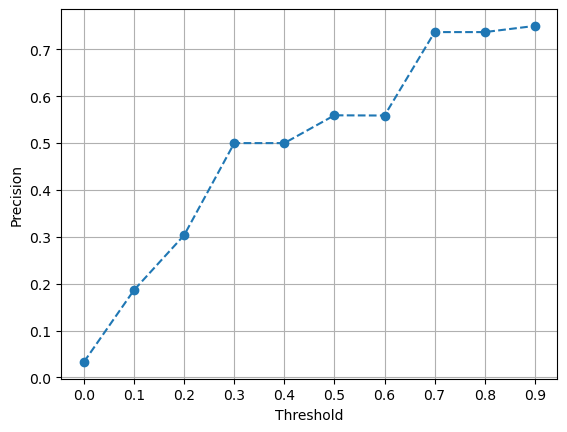

In [12]:
#Uncomment to visualize precision changes
plt.plot(results_df['threshold'], results_df['precision'], '--o', label = 'precision')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid();

[Back to top](#-Index)

### Problem 3

#### A Recall threshold function



Similar to your `precision_thresh` function, complete the function `recall_thresh` below to compute the recall given a threshold.  Your function should use the `recall_score` function to return the recall score between `y_test` and `preds` with `pos_label='Yes'`.


Inside the `result_df` DataFrame, add a column called `recall`. This column should contain the recall values at each threshold calculated using the `recall_thresh` function. 

In [13]:

def recall_thresh(predict_probs, 
                  y_test, 
                  thresh):
    """Given predicted probabilities and a threshold, this function
    computes predictions for the positive class at or above the threshold
    and returns the subesequent recall score for that thresholds predictions 
    against the test data.
    
    Parameters
    ----------
    predict_probs: type 'np.ndarray'
        1D NumPy array of probabilities for positive class
    y_test: type `np.ndarray`
        1D NumPy array of test label
    thresh: type `float`
        threshold for positive classification at or above
          
    Returns a float for recall value
    """
    preds = np.where(predict_probs >= thresh, 'Yes', 'No')

    return recall_score(y_test, preds, pos_label='Yes')



# Answer check
print(recall_thresh(test_predictions[:, 1], y_test, 0.1))
print(recall_thresh(test_predictions[:, 1], y_test, 0.9))
results_df

0.7710843373493976
0.07228915662650602


,threshold,precision
0,0.0,0.033200
1,0.1,0.186589
2,0.2,0.303571
3,0.3,0.500000
4,0.4,0.500000
5,0.5,0.559322
6,0.6,0.558824
7,0.7,0.736842
8,0.8,0.736842
9,0.9,0.750000


[Back to top](#-Index)

### Problem 4

#### Precision vs. Recall Tradeoff



As you see in the plot below, based on the `results_df` improving the precision involves a decrease in recall.  

<center>
    <img src = 'images/precall.png'/>
</center>

scikit learn implements a function `precision_recall_curve` that takes as arguments `y_true`, `probas_pred`, `pos_label=None`. 

The function returns the values for precision, recall, and the decision thresholds.  Use the probabilities in `test_predictions` in the `precision_recall_curve` function, and assign the results to `precision`, `recall`, and `boundaries` below.  Uncomment the plot to visualize your results.

[0.  0.1 0.2 0.3 0.4]


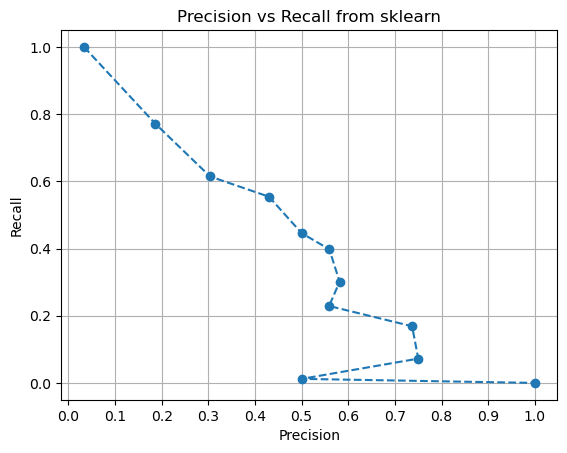

In [15]:

precision, recall, boundaries = precision_recall_curve(y_test, test_predictions[:, 1], pos_label='Yes')



# Answer check
print(boundaries[:5])
plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall from sklearn');

[Back to top](#-Index)

### Problem 5

#### ROC Curve



Similar to the `precision_recall_curve` the `roc_curve` function takes in `y_true` and `y_score`, which can be predicted probabilities.  The function returns the false positive rates, true positive rates, and thresholds.  Assign these to `fpr`, `tpr`, and `thresh_rocs` below.  Uncomment the code to visualize the ROC curve. 

False Positive Rates:  [0.         0.00041374 0.00082747 0.00206868 0.00620604]
True Positive Rates:  [0.         0.01204819 0.07228916 0.1686747  0.22891566]


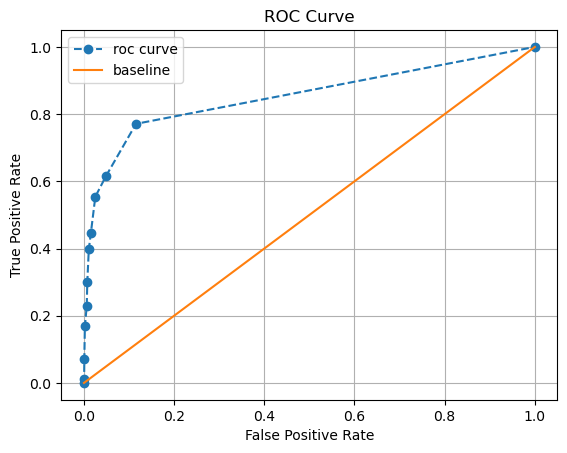

In [16]:

fpr, tpr, thresh_rocs = roc_curve(y_test, test_predictions[:, 1], pos_label='Yes')



# Answer check
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

[Back to top](#-Index)

### Problem 6

#### Area Under Curve as metric



Finally, consider the proposed area under the curve scoring method described in the lectures.  Below, construct a grid search named `roc_grid` that uses the `knn_pipe` and searches over the number of neighbors from 1 to 31 by odd values, choosing the model that optimizes `roc_auc_score`.  Identify the optimal number of neighbors and assign them to `best_k` below.  

In [17]:

roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
best_k = roc_grid.best_params_['knn__n_neighbors']


# Answer check
best_k

29

#### Visualizing with scikitlearn

Below, we use the `RocCurveDisplay` to display roc curves for three knn models.  You can either use predictions or estimators to create the visualization.  Below, we use the `from_estimator` method.

In [18]:
from sklearn.metrics import RocCurveDisplay

In [19]:
knn_1 = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors = 1))])
knn_1.fit(X_train, y_train)

c:\Users\steve\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['student'])])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

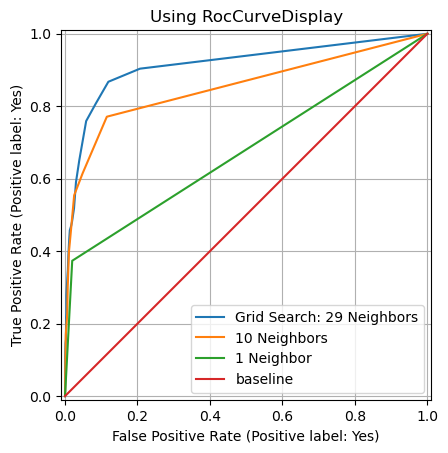

In [20]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, pos_label = 'Yes', ax = ax, label = 'Grid Search: 29 Neighbors')
RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, pos_label = 'Yes', ax = ax, label = '10 Neighbors')
RocCurveDisplay.from_estimator(knn_1, X_test, y_test, ax = ax, label = '1 Neighbor')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();